In [174]:
import cv2
import numpy as np

In [175]:
image = cv2.imread('emza_vahid.jpg')

In [176]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

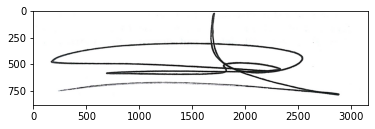

In [178]:
plt.imshow(img)

In [179]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGBA2GRAY)

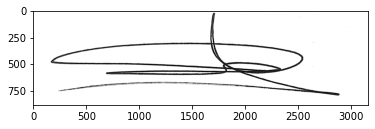

In [180]:
plt.imshow(img_gray, cmap = 'gray')

In [181]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

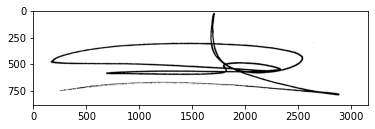

In [182]:
plt.imshow(thresh1, cmap='gray')

In [183]:
mask_inv = cv2.bitwise_not(thresh1)

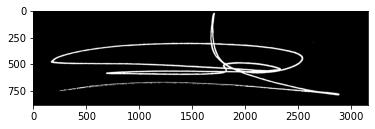

In [184]:
plt.imshow(mask_inv, cmap = 'gray')

In [185]:
fg = cv2.bitwise_and(img, img, mask=mask_inv)

In [186]:
#fg1 = fg[:,:]

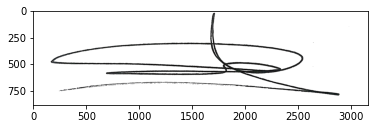

In [187]:
plt.imshow(fg)

In [188]:
fg_final = cv2.cvtColor(fg, cv2.COLOR_RGBA2BGRA)

In [189]:
cv2.imwrite('assinatura.png', fg_final)

True

# Making a graphical interface

In [2]:
from tkinter import filedialog
from PIL import Image, ImageTk
import tkinter as tk
import numpy as np
import cv2



class Root(tk.Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Making a Transparent Signature")
        self.minsize(440, 300)

        self.labelFrame = tk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)

        self.button()


    def button(self):
        self.button = tk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)


    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir = ".", 
                                          title = "Select a File", 
                                          filetypes = (("Image files", 
                                                        ["*.jpg", "*.jpeg", "*.png"]), 
                                                       ("all files", 
                                                        "*.*")))  
        self.label = tk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)

        image = Image.open(self.filename)
        self.image_numpy = np.array(image)
        image.thumbnail((300,200),Image.ANTIALIAS)

        photo = ImageTk.PhotoImage(image)
        
        self.label2 = tk.Label(image=photo)
        self.label2.image = photo 
        self.label2.grid(column=0, row=4)

        #running the button_tranform
        self.button_transform()
    
    def button_transform(self):
        self.button_trans = tk.Button(self, text = "Transform",command = self.transform)
        self.button_trans.grid(column = 0, row = 6)
    
    
    def transform(self):
        img = cv2.cvtColor(self.image_numpy, cv2.COLOR_RGB2RGBA)
        img_gray = cv2.cvtColor(img,cv2.COLOR_RGBA2GRAY)
        ret,thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(thresh1)
        self.fg = cv2.bitwise_and(img, img, mask=mask_inv)
        fg_image = Image.fromarray(self.fg)
        fg_image.thumbnail((300,200),Image.ANTIALIAS)
        fg_photo =  ImageTk.PhotoImage(image=fg_image)

        
        self.label3 = tk.Label(image=fg_photo)
        self.label3.image = fg_photo 
        self.label3.grid(column=1, row=4)

        self.button_save()

    def button_save(self):
        self.button_save = tk.Button(self, text = "Save", command = self.save)
        self.button_save.grid(column = 1, row = 6)

    def save(self):
        fg_final = cv2.cvtColor(self.fg, cv2.COLOR_RGBA2BGRA)
        cv2.imwrite('assinatura.png', fg_final)

        


root = Root()
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/vahid/miniconda3/lib/python3.7/site-packages/PIL/Image.py", line 2882, in open
    fp.seek(0)
AttributeError: 'tuple' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/vahid/miniconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-2-f0c949990fb6>", line 37, in fileDialog
    image = Image.open(self.filename)
  File "/home/vahid/miniconda3/lib/python3.7/site-packages/PIL/Image.py", line 2884, in open
    fp = io.BytesIO(fp.read())
AttributeError: 'tuple' object has no attribute 'read'
